In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)


In [2]:
DATA_PATH = os.path.join("..", "data", "raw", "shopping_behavior.csv")
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())


Shape: (3900, 18)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
display(df.info())

missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("Missing columns:", len(missing))
display(missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

None

Missing columns: 0


Series([], dtype: int64)

In [4]:
dup = df.duplicated().sum()
print("Duplicated rows:", dup)


Duplicated rows: 0


In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print("Numeric:", num_cols)
print("Categorical:", cat_cols)


Numeric: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Categorical: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


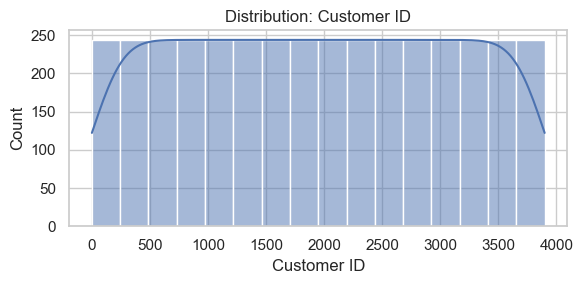

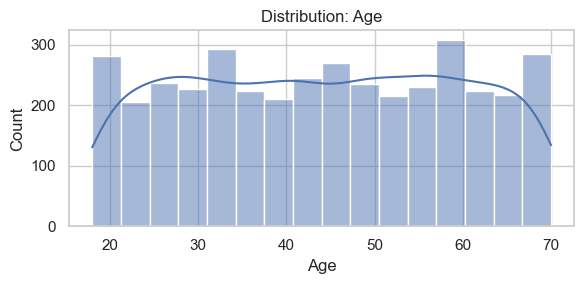

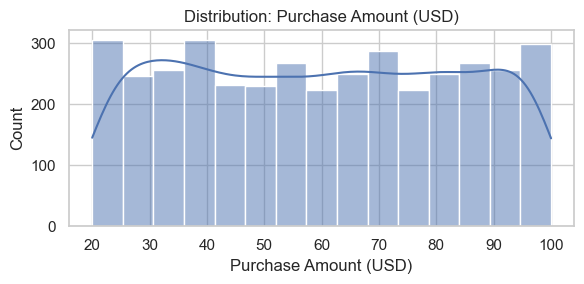

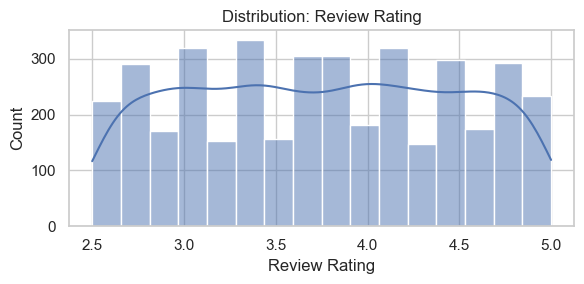

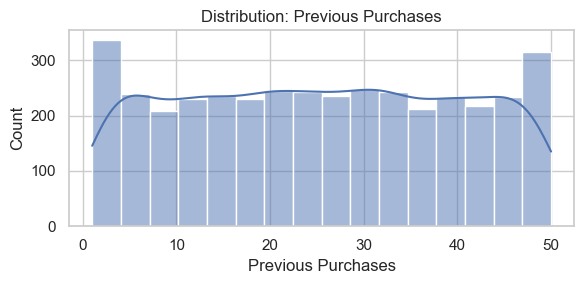

In [6]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution: {col}")
    plt.tight_layout()
    plt.show()


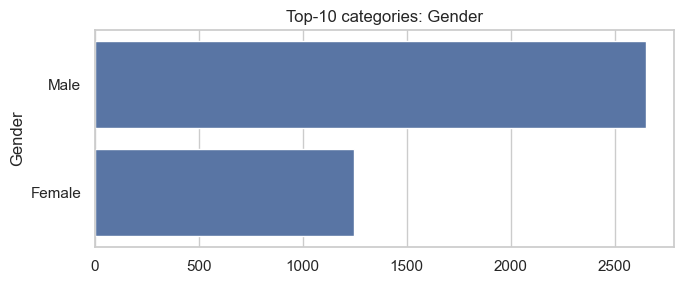

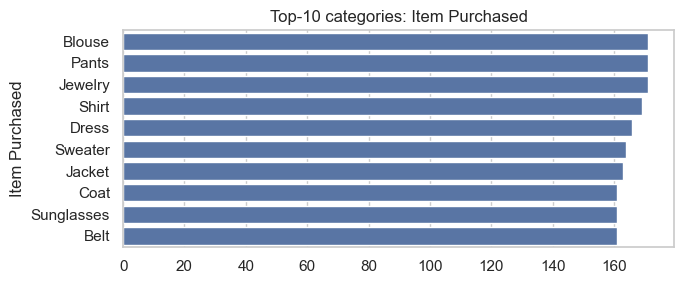

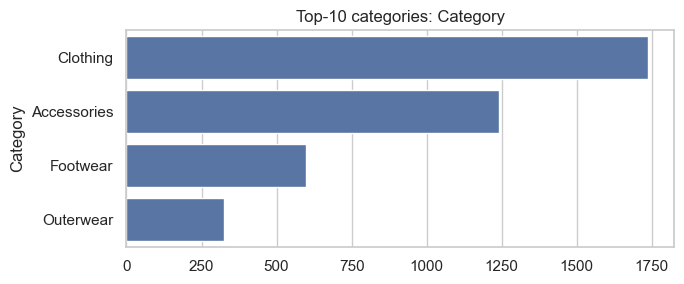

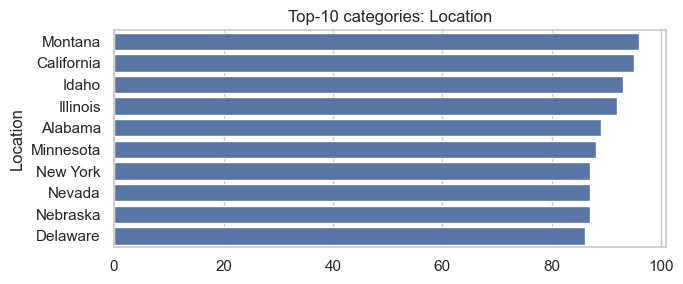

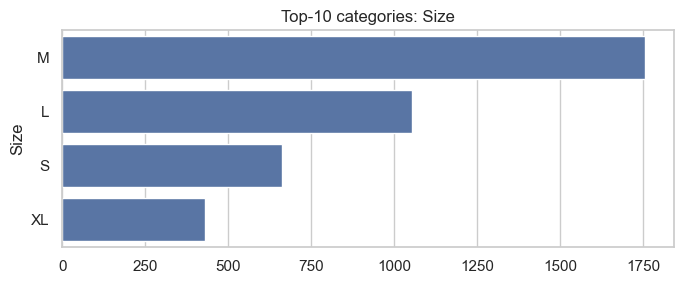

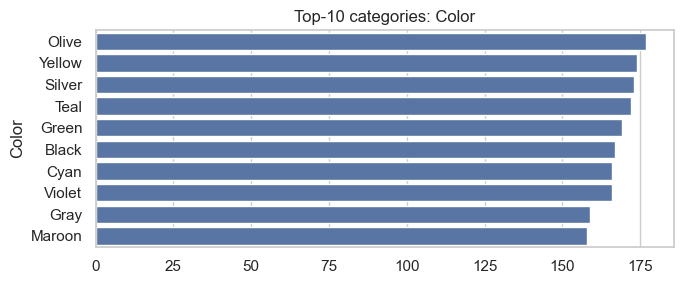

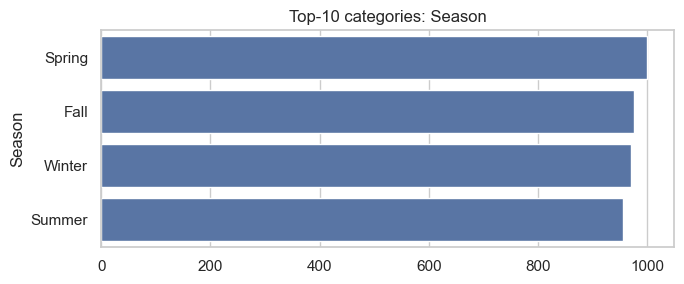

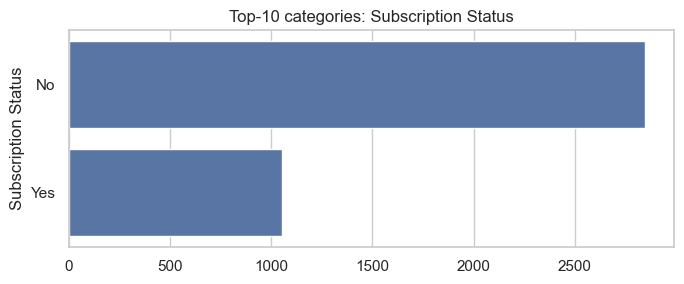

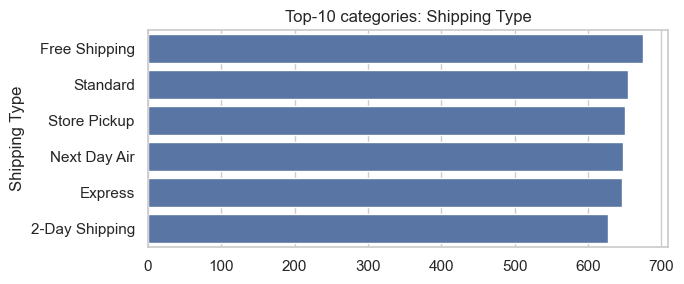

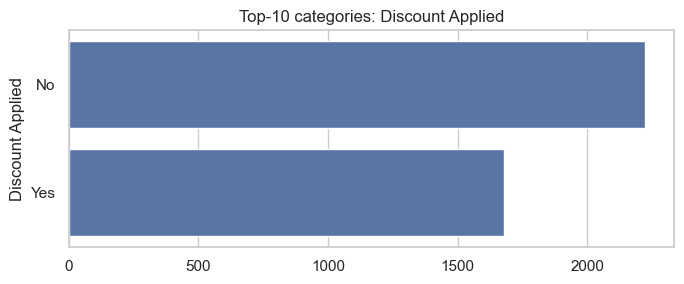

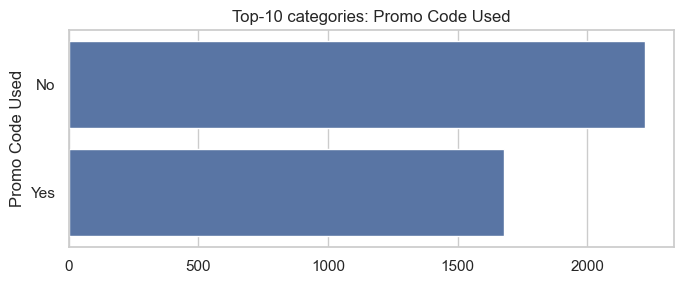

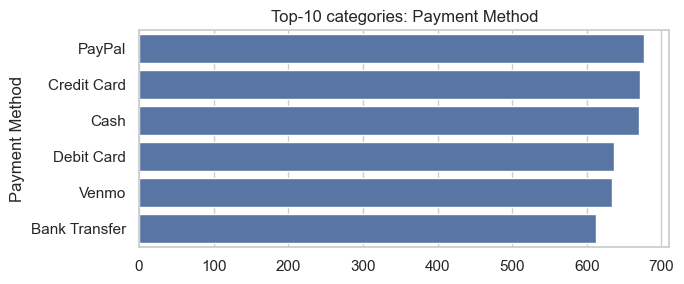

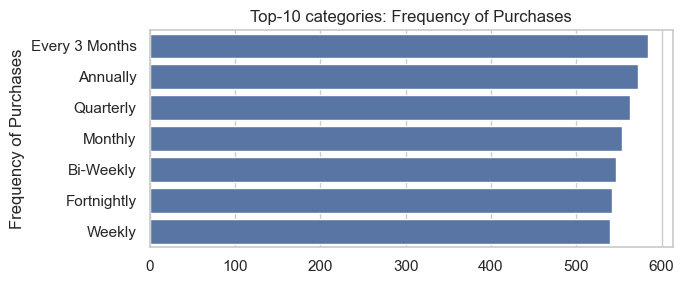

In [7]:
for col in cat_cols:
    vc = df[col].astype(str).value_counts().head(10)
    plt.figure(figsize=(7, 3))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top-10 categories: {col}")
    plt.tight_layout()
    plt.show()


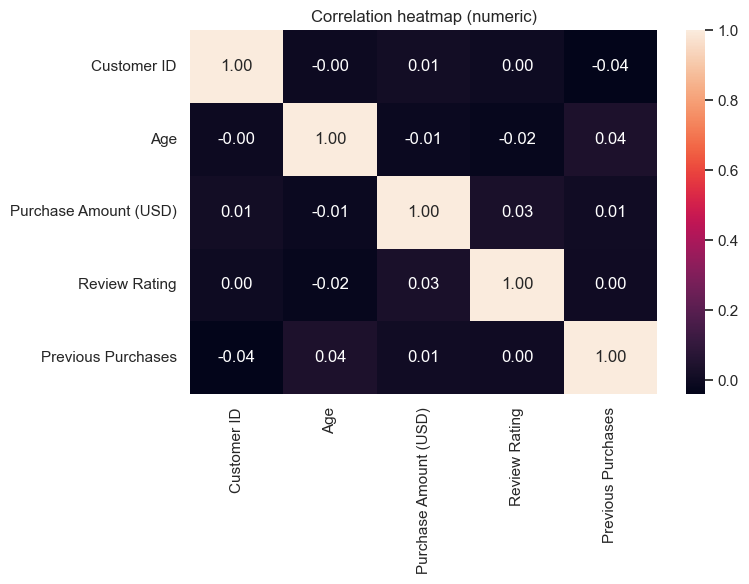

In [8]:
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    corr = df[num_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.title("Correlation heatmap (numeric)")
    plt.tight_layout()
    plt.show()


In [9]:
OUT_DIR = os.path.join("..", "results", "figures")
os.makedirs(OUT_DIR, exist_ok=True)

# пример: сохраняем корреляцию (если есть)
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    corr = df[num_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.title("Correlation heatmap (numeric)")
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "corr_heatmap.png"), dpi=150)
    plt.close()

print("Saved to:", OUT_DIR)


Saved to: ..\results\figures
